## Solutions to problem_2 of Assignment_1
Importing of library required for problem 2

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for graph to be plotted on Notebook
%matplotlib inline
import seaborn as sns
import pylab as pl
# displaying maximum of 5 rows
pd.set_option('display.max_rows', 10)

In [29]:
train_data = pd.read_csv('P2_data/P2_train.csv', header = None)
test_data = pd.read_csv('P2_data/P2_test.csv', header = None)
train_data

,0,1,2
0,0.445235,-2.083006,1
1,1.871452,-0.626011,1
2,-2.972692,0.025545,0
3,0.861221,-1.170108,1
4,-2.098894,-1.705435,0
...,...,...,...
305,0.693420,-1.630972,1
306,-2.639023,2.362222,0
307,0.065896,-1.185387,1
308,0.565275,-2.039740,1


In [30]:
index_0 = []
index_1 = []
for i in range(len(train_data)):
    if train_data[2][i] == 0:
        index_0.append(i)
    else:
        index_1.append(i)

In [46]:
prob_0 = len(index_0)/len(train_data)
prob_1 = 1 - prob_0
train_0 = train_data.iloc[index_0,0:2]
train_1 = train_data.iloc[index_1,0:2]
train_label = train_data[2]
train_label
train_0

,0,1
2,-2.972692,0.025545
4,-2.098894,-1.705435
5,-2.699412,-0.862741
6,-3.012144,2.841946
11,-2.389140,1.369334
...,...,...
297,-2.810042,-0.519979
302,-2.917438,0.195517
304,-2.430467,0.780332
306,-2.639023,2.362222


mean_0 and mean_1 are means of data corresponding to labels 0 and 1 respectively.
covariance_0 and covariance_1 are covariance corresponding to labels 0 and 1 respectively.

In [32]:
mean_0 = train_0.mean()
mean_0

0   -2.486466
1    0.237015
dtype: float64

In [33]:
mean_1 = train_1.mean()
mean_1

0    1.056773
1   -1.252551
dtype: float64

In [35]:
cov_0 = train_0.cov()
cov_0

,0,1
0,0.108311,0.107581
1,0.107581,7.096614


In [36]:
cov_1 = train_1.cov()
cov_1

,0,1
0,1.044242,0.582464
1,0.582464,1.288759


test stores the first two columns of Dataframe except labels.
And test_label stores corresponding labels.

In [37]:
test = test_data.iloc[:,0:2]
test_label =test_data[2]
test.shape

(90, 2)

In [38]:
test_label

0     0
1     0
2     1
3     0
4     0
     ..
85    0
86    0
87    1
88    0
89    0
Name: 2, Length: 90, dtype: int64

In [39]:
from scipy.stats import multivariate_normal
y0 = multivariate_normal.pdf(test,mean=mean_0,cov=cov_0)*prob_0
y1 = multivariate_normal.pdf(test,mean=mean_1,cov=cov_1)*prob_1

In [41]:
label_predicted= []
for i in range(len(y1)):
    if y0[i] > y1[i]:
        label_predicted.append(0)
    else:
        label_predicted.append(1)
# list_predicted

In [44]:
correct = 0
for i in range(len(test_data)):
    if(test_label[i] == label_predicted[i]):
        correct += 1
correct

90

In [45]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_data[2],list_predicted)
conf_mat

array([[50,  0],
       [ 0, 40]])

Now finding the misclassification error.As we see misclassification_error is 0% i.e. Accuracy is 100%.

In [20]:
misclassification_error = (conf_mat[0][1]+conf_mat[1][0])/(conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1])
misclassification_error

0.0

## Part(a)
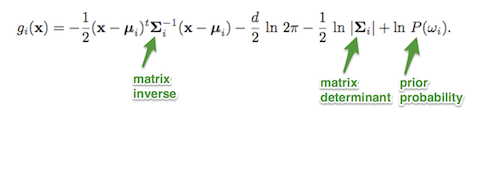

Function for plot the discriminant function and iso-probability contours

In [61]:
def contour(C1, C2):
    D = 2

    M1 = np.array([0.0, 0.0])
    M2 = np.array([1.0, 1.0])

    X, Y = np.mgrid[-2:2:100j, -2:2:100j]
    points = np.c_[X.ravel(), Y.ravel()]

    invC = np.linalg.inv(C1)
    v = points - M1
    g1 = -0.5*np.sum(np.dot(v, invC) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C1))
    g1.shape = 100, 100

    invC = np.linalg.inv(C2)
    v = points - M2
    g2 = -0.5*np.sum(np.dot(v, invC) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C2))
    g2.shape = 100, 100

    fig, axes = pl.subplots(1, 1, figsize=(5, 5))

    axes.pcolormesh(X, Y, g1)

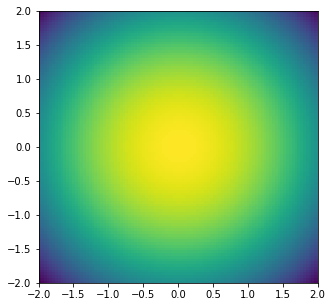

In [62]:
sigma1 = sigma2 = [[5, 0],[0, 5]]
contour(sigma1, sigma2)

## Part(b)

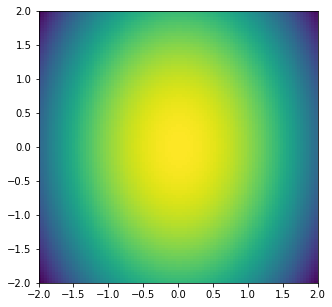

In [63]:
sigma1 = sigma2 = [[5 ,0], [0, 10]]
contour(sigma1, sigma2)

## Part(c)

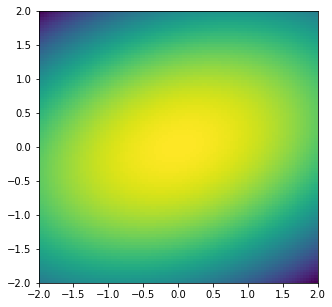

In [65]:
sigma1 = sigma2 = [[2.0, 0.4], [0.4, 1.0]]
contour(sigma1, sigma2)

## Part(d)

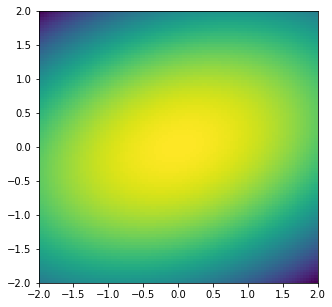

In [67]:
sigma1 = np.array([[2.0, 0.4], [0.4, 1.0]])
sigma2 = np.array([[1.0, 0.6], [0.6, 2.0]])
contour(sigma1, sigma2)